In [64]:
import numpy as np
import pandas as pd

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
from ast import literal_eval
from scipy.fftpack import dct
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.fftpack import idct
from sklearn import preprocessing

In [ ]:
# df1 = pd.read_csv('/content/drive/MyDrive/轨道/情感轨道打分数据/data/new_demo_两条_df.csv')
# df1

In [ ]:
# df2 = pd.read_csv("/content/drive/MyDrive/data/0416_all_7cluster_3_4.csv")
# df2

,Unnamed: 0,nopunc,score,ids2,label
0,0,一些 发达国家 代表 承认 国际 经济 关系 应当 改革 据 新华社 马尼拉 五月 十八日 ...,"[0.007176175628499161, 0.1272559291237121, -0....","[0.0004716197, 0.0007160308, 0.0005823414, 0.0...",5
1,1,一批 重点 影片 纪念 抗战 胜利 周年 张晋锋 在 隆重 纪念 中国 人民 抗日战争 和 ...,"[0.111586685529917, 0.030891513012164223, 0.20...","[0.0004934977, 0.00076449395, 0.000670637, 0.0...",0
2,2,丁声俊 如何 解决 中国 的 粮食 问题 能否 把 立足点 建立 在 国外市场 上 回答 是...,"[-0.4139912474383393, -0.08397007320800041, -0...","[0.0004764883, 0.0007095004, 0.00065429474, 0....",2
3,3,丁浩金 王聿中 西方 国家 中 普遍 进行 的 产业 结构调整 是 当前 世界 经济 发展 ...,"[-0.023843820911957945, -0.06904150990749916, ...","[0.00049988466, 0.00076878694, 0.0007371777, 0...",4
4,4,丁玲 人民文学出版社 决定 重印 太阳 照在 桑乾河 上 我 是 高兴 的 这 本书 在 市...,"[-0.09931170244428765, 0.19658832192412906, 0....","[0.00051732024, 0.0008186594, 0.000798648, 0.0...",4
...,...,...,...,...,...
22488,6095,马巍年 中国 电影 市场 春节 档 创造 了 新 的 纪录 得益于 多部 本土 贺岁 新片 ...,"[0.01587601603410936, 0.03764139184979351, 0.0...","[0.00047775434, 0.00074808166, 0.00064183446, ...",2
22489,6096,马本斋 抗日战争 时期 在 华北平原 上 活跃 着 一支 以 回民 兄弟 为主 组成 的 抗...,"[0.09842621728702378, 0.012364107498986858, 0....","[0.00050345284, 0.0008048199, 0.00074749044, 0...",5
22490,6097,黄国越 强烈 谴责 美机 轰炸 北方 的 强盗 罪行 强调 越南 南北方 人民 决心 战胜 ...,"[0.008617210604590055, -0.010541628111763762, ...","[0.00050013704, 0.00077063765, 0.0007441554, 0...",5
22491,6098,黑脸 琵鹭 请 让 我 来 关心 你 本报记者 钟嘉 严寒 挡不住 野生动物 保护者 们 的...,"[-0.13765827980058357, 0.21133572460376754, -0...","[0.00048234698, 0.0007665205, 0.0007214704, 0....",5


In [ ]:
# df1.drop(columns=['ids'], inplace=True)
# df1

In [ ]:
# df = pd.concat([df1, df2])
# df

,Unnamed: 0,nopunc,score,ids2,label
0,0,一九六九年 四月 一日 报告 四月 十四日 通过 林彪 同志 们 中国共产党第九次全国代表大...,"[0.03160141239429076, -0.04957382465915392, -0...","[0.00048361006, 0.0007332484, 0.0007011582, 0....",4
1,1,三月份 月度 进出口 规模 创新 高 本报 北京 月 日 讯 记者 杜 海涛 报道 海关 最...,"[0.04964349019864235, 0.10936169526692757, 0.2...","[0.00047500295, 0.0006828284, 0.0005490131, 0....",3
2,2,上海 石油化工 总厂 靠 智力开发 起飞 本报记者 吴复民 红玛瑙 似的 运转 指示灯 蓦然...,"[0.08104942550423407, 0.13883518507868425, 0.0...","[0.00047698742, 0.00074580207, 0.00063491095, ...",4
3,3,下关市 举行宴会 欢迎 廖承志 副委员长 一行 据 新华社 下关 五月 九日 电以 廖承志 ...,"[-0.0023794892647571574, 0.07346247383454761, ...","[0.00051801256, 0.000820847, 0.00079044106, 0....",1
4,4,世界 人民 和平 大会 记事 袁水拍 和平 运动 的 老战士 们 像 意大利 多尼 尼 教授...,"[-0.02011695787621593, 0.055439573707884174, 0...","[0.00050378207, 0.0008450187, 0.000899082, 0.0...",5
...,...,...,...,...,...
22488,6095,马巍年 中国 电影 市场 春节 档 创造 了 新 的 纪录 得益于 多部 本土 贺岁 新片 ...,"[0.01587601603410936, 0.03764139184979351, 0.0...","[0.00047775434, 0.00074808166, 0.00064183446, ...",2
22489,6096,马本斋 抗日战争 时期 在 华北平原 上 活跃 着 一支 以 回民 兄弟 为主 组成 的 抗...,"[0.09842621728702378, 0.012364107498986858, 0....","[0.00050345284, 0.0008048199, 0.00074749044, 0...",5
22490,6097,黄国越 强烈 谴责 美机 轰炸 北方 的 强盗 罪行 强调 越南 南北方 人民 决心 战胜 ...,"[0.008617210604590055, -0.010541628111763762, ...","[0.00050013704, 0.00077063765, 0.0007441554, 0...",5
22491,6098,黑脸 琵鹭 请 让 我 来 关心 你 本报记者 钟嘉 严寒 挡不住 野生动物 保护者 们 的...,"[-0.13765827980058357, 0.21133572460376754, -0...","[0.00048234698, 0.0007665205, 0.0007214704, 0....",5


In [67]:
df = pd.read_csv('/content/drive/MyDrive/轨道/3w条新闻的情感词汇分数和对应的轨道标签/new_100条__data_0608.csv')
df

,Unnamed: 0,nopunc,score,ids2,label,cluster_db
0,22583,寸树声 在 昆明 逝世 政协主席 邓小平 等 送 了 花圈 新华社 昆明 四月 十二日 电 ...,"[-0.17269519119616167, 0.04672116015690093, -0...","[0.00051374035, 0.0007875004, 0.00072606694, 0...",6,0
1,26666,头 三月 外贸 进出口 总值 比 去年同期 增长 百分之十五 点 九 本报 北京 月 日 讯...,"[-0.08272168340895607, 0.0003921515593557096, ...","[0.00045103155, 0.00063129066, 0.0005566096, 0...",3,0
2,28565,本报记者 袁泉 大米 市场价 四五十元 水稻 收购价 却 不到 两元 最近 一些 媒体 质疑...,"[0.02208667020057206, -0.0197580489001283, -0....","[0.00048554485, 0.00069760234, 0.00058452337, ...",4,0
3,5333,从 二三百 美元 达到 一千美元 要 多少 年 问 编辑 同志 我们 想 了解 一下 世界 ...,"[0.005414972940424628, 0.006805516641449858, 0...","[0.00048636642, 0.00074270775, 0.0006064196, 0...",5,0
4,14629,张立云 通俗读物 对 广大 人民 的 教育 作用 是 没有 人 能够 怀疑 的 在 广大 劳...,"[-0.05742199964646208, 0.03597075574862987, -0...","[0.000495843, 0.0007715342, 0.000648067, 0.001...",6,0
...,...,...,...,...,...,...
95,24566,我 选手 胜十盘 负 六盘 少年 选手 打 得 出色 据 新华社 十九日 讯 东京 消息 中...,"[0.12767158843887152, 0.22459744794890707, 0.4...","[0.0004750648, 0.0006858, 0.0005785733, 0.0021...",2,0
96,5935,关于 灯光 围网 渔轮 捕鱼 的 规定 新华社 三十一日 讯 中国 渔业 协会 和 日 中 ...,"[-0.10916880931742405, 0.018119385340829193, 2...","[0.00052401045, 0.00082849344, 0.00063209824, ...",2,0
97,6265,本报讯 记者 黄其祥 报道 首次 由 中国 主办 的 亚洲 农业 记者 研讨会 月 日 在京...,"[-0.039879105292089656, -0.09390570434260517, ...","[0.0004636238, 0.0007197013, 0.0005683645, 0.0...",4,0
98,9911,本报 东京 月 日电 记者 于青 报道 日本自民党 政治 改革 推进 本部 今天上午 在 自...,"[0.03613502140369786, 0.0020224366736694343, -...","[0.0005090605, 0.0008307551, 0.00076372386, 0....",3,0


In [68]:
df.index = range(len(df))
df

,Unnamed: 0,nopunc,score,ids2,label,cluster_db
0,22583,寸树声 在 昆明 逝世 政协主席 邓小平 等 送 了 花圈 新华社 昆明 四月 十二日 电 ...,"[-0.17269519119616167, 0.04672116015690093, -0...","[0.00051374035, 0.0007875004, 0.00072606694, 0...",6,0
1,26666,头 三月 外贸 进出口 总值 比 去年同期 增长 百分之十五 点 九 本报 北京 月 日 讯...,"[-0.08272168340895607, 0.0003921515593557096, ...","[0.00045103155, 0.00063129066, 0.0005566096, 0...",3,0
2,28565,本报记者 袁泉 大米 市场价 四五十元 水稻 收购价 却 不到 两元 最近 一些 媒体 质疑...,"[0.02208667020057206, -0.0197580489001283, -0....","[0.00048554485, 0.00069760234, 0.00058452337, ...",4,0
3,5333,从 二三百 美元 达到 一千美元 要 多少 年 问 编辑 同志 我们 想 了解 一下 世界 ...,"[0.005414972940424628, 0.006805516641449858, 0...","[0.00048636642, 0.00074270775, 0.0006064196, 0...",5,0
4,14629,张立云 通俗读物 对 广大 人民 的 教育 作用 是 没有 人 能够 怀疑 的 在 广大 劳...,"[-0.05742199964646208, 0.03597075574862987, -0...","[0.000495843, 0.0007715342, 0.000648067, 0.001...",6,0
...,...,...,...,...,...,...
95,24566,我 选手 胜十盘 负 六盘 少年 选手 打 得 出色 据 新华社 十九日 讯 东京 消息 中...,"[0.12767158843887152, 0.22459744794890707, 0.4...","[0.0004750648, 0.0006858, 0.0005785733, 0.0021...",2,0
96,5935,关于 灯光 围网 渔轮 捕鱼 的 规定 新华社 三十一日 讯 中国 渔业 协会 和 日 中 ...,"[-0.10916880931742405, 0.018119385340829193, 2...","[0.00052401045, 0.00082849344, 0.00063209824, ...",2,0
97,6265,本报讯 记者 黄其祥 报道 首次 由 中国 主办 的 亚洲 农业 记者 研讨会 月 日 在京...,"[-0.039879105292089656, -0.09390570434260517, ...","[0.0004636238, 0.0007197013, 0.0005683645, 0.0...",4,0
98,9911,本报 东京 月 日电 记者 于青 报道 日本自民党 政治 改革 推进 本部 今天上午 在 自...,"[0.03613502140369786, 0.0020224366736694343, -...","[0.0005090605, 0.0008307551, 0.00076372386, 0....",3,0


[8, 29, 34, 36, 39, 47, 49, 53, 64, 3, 16, 26, 31, 32, 54, 55, 56, 60, 66, 80, 85, 88, 92, 0, 1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 30, 33]


,Unnamed: 0,nopunc,score,ids2,label,cluster_db
0,18035,本报 评论员 日本首相 岸信 介的 东南亚 五国 之行 从 月 日 抵达 仰光 到 月 日 ...,"[-0.0038761309260749496, -0.11965509088785244,...","[0.0005283885, 0.00085630326, 0.0008567112, 0....",0,0
1,3571,死亡 人数 仍 居高不下 重 特大事故 尚未 有效 遏制 本报 北京 月 日 讯 记者 彭嘉...,"[0.0046436703015258415, -0.12677482132145174, ...","[0.00051479205, 0.0008267846, 0.0007416491, 0....",0,0
2,12326,新华社 北京 月 日电 日本自民党 总务 会长 伊东 正义 先生 作为 日本首相 特使 预定...,"[0.3578358898089807, 0.08161251164610346, 0.11...","[0.0004722392, 0.00072869874, 0.00058751204, 0...",0,0
3,29706,本报 宁波 月 日电 记者 陆娅楠 月 日 杉杉 集团 有限公司 与 日本 伊藤忠 商事 株...,"[-0.303011174543276, 0.0032854388120253653, 0....","[0.00045990184, 0.0007084661, 0.0006132199, 0....",0,0
4,7697,新华社 一九七五年 一月 十五日 讯 据 日本 东方 通讯社 报道 一九七四年 日本 企业倒...,"[-0.0059179321907659906, -0.0731447363179498, ...","[0.0004908887, 0.0007480143, 0.000604546, 0.00...",0,0
5,2437,本报 东京 月 日电 记者 于青 报道 日本政府 内阁会议 今天 决定 向 中国 南部 水灾...,"[-0.02468244892408373, 0.16543349252372455, 0....","[0.00046329183, 0.00070480444, 0.0005240025, 0...",0,0
6,13868,本报讯 记者 李丽辉 报道 日前 中国保监会 主席 吴定富 宣布 中国保监会 批准 英国 标...,"[0.056018661112242046, 0.027020653065623686, -...","[0.0004801159, 0.00074307574, 0.000648965, 0.0...",0,0
7,18301,为期 两天 的 中国 东盟 文化 部长会议 与 东盟 中日韩 文化部长 系列 会议 于 日 ...,"[0.2538221689732428, -0.12466527668357397, -0....","[0.0004300173, 0.0006546416, 0.00044636868, 0....",0,0
8,6051,我 华侨 政策 不容 诋毁 越南 排华 是 为了 反华 苏越 合谋 反华 是因为 中国 坚决...,"[0.04909594366811509, -0.25454754978558125, -0...","[0.0005256694, 0.00087940495, 0.0010792044, 0....",0,0
9,5333,从 二三百 美元 达到 一千美元 要 多少 年 问 编辑 同志 我们 想 了解 一下 世界 ...,"[0.005414972940424628, 0.006805516641449858, 0...","[0.00048636642, 0.00074270775, 0.0006064196, 0...",5,0


In [71]:
def standalize1(data):
    mu=np.mean(data,axis=0)
    sigma=np.std(data,axis=0)
    return (data-mu)/sigma

def standalize2(data):
    data=[1/(1+np.exp(-x)) for x in data]
    return data

In [72]:
newdata=[]
min_max_scaler = preprocessing.MinMaxScaler()
for i in range(len(df_after_select)):
    tem=literal_eval(df_after_select.iloc[i,2])
    # tem=dct(tem, n=200)#dct变换
    tem=dct(tem)#dct变换
    tem = tem[:5]
    tem = tem/2
    tem = idct(tem, n=100)
    tem = tem/100
#     tem=standalize2(tem)#进行softmax标准化
    tem = min_max_scaler.fit_transform(tem.reshape(-1,1))
    newdata.append(tem.reshape(1,-1)[0])
#     newdata.append(tem)
data1=newdata
data1

[array([0.60181368, 0.60017131, 0.5969161 , 0.59210671, 0.58583001,
        0.57819986, 0.56935537, 0.55945888, 0.54869355, 0.53726066,
        0.52537661, 0.51326971, 0.50117685, 0.4893399 , 0.47800213,
        0.46740464, 0.45778264, 0.44936201, 0.44235585, 0.43696121,
        0.43335613, 0.43169683, 0.4321153 , 0.43471712, 0.43957975,
        0.44675113, 0.45624872, 0.46805897, 0.48213718, 0.49840783,
        0.51676529, 0.53707495, 0.55917475, 0.58287711, 0.6079711 ,
        0.63422502, 0.66138922, 0.68919912, 0.71737843, 0.74564253,
        0.77370194, 0.80126579, 0.82804534, 0.85375745, 0.87812789,
        0.90089454, 0.92181045, 0.94064662, 0.95719452, 0.97126832,
        0.98270689, 0.99137528, 0.99716603, 1.        , 0.99982689,
        0.9966253 , 0.99040258, 0.98119411, 0.96906245, 0.95409606,
        0.93640769, 0.91613264, 0.89342662, 0.86846357, 0.8414332 ,
        0.81253847, 0.78199295, 0.7500182 , 0.71684107, 0.68269107,
        0.64779786, 0.61238878, 0.57668655, 0.54

In [73]:
std_data1 = data1
bins=100
cluster=7

In [75]:
kmeans = KMeans(n_clusters=cluster, random_state=0).fit(std_data1)
label=pd.Series(kmeans.labels_)
#std_data1["label"]=label#保存分类

#画出同类的图
std_data1=pd.DataFrame(std_data1,dtype=np.float64)#转变数据类型
std_data1["label"]=label#保存分类
#得到平均值和标准差
mean=std_data1.groupby("label").mean()
std=std_data1.groupby("label").std()
low=mean-std
high=mean+std
#画图
col=[x for x in range(1,bins+1)]
if cluster%2==0:
    row=cluster/2
else:
    row=int(cluster/2)+1

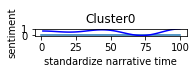

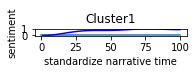

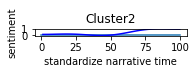

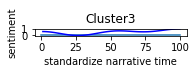

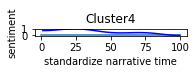

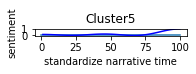

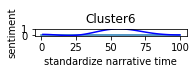

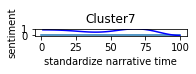

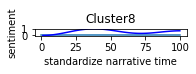

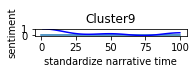

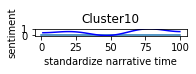

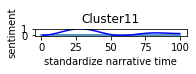

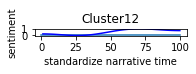

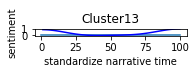

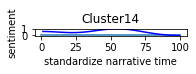

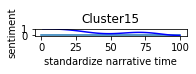

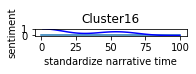

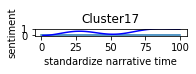

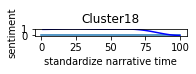

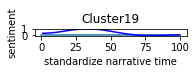

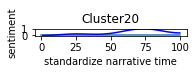

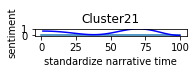

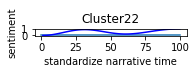

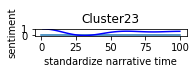

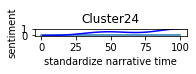

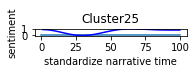

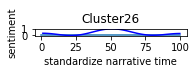

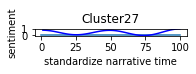

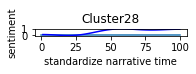

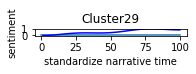

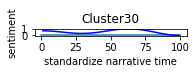

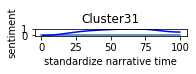

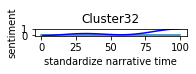

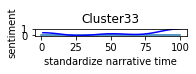

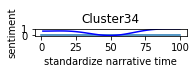

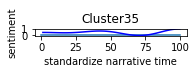

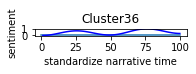

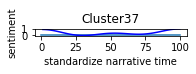

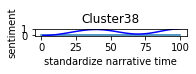

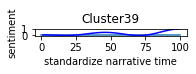

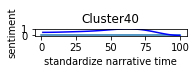

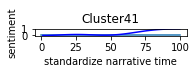

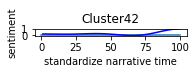

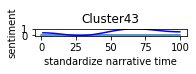

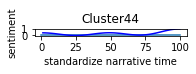

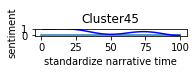

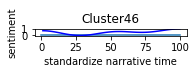

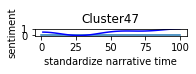

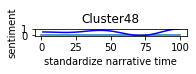

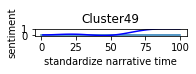

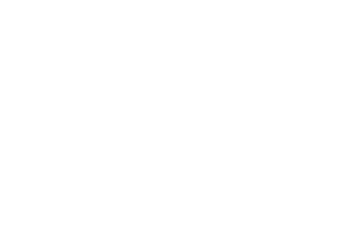

In [76]:
for i in range(cluster):
    plt.subplot(int(row),2,int(i+1))
    plt.plot([0,bins],[0,0])#画0的水平线
    plt.plot(col,mean.iloc[i,:],"b")
    plt.plot(col,low.iloc[i,:],"r")
    plt.plot(col,high.iloc[i,:],"r")
    #plt.xticks(range(0,bins+1,3))
    #plt.yticks(np.linspace(-1,1,9))
    plt.xlabel("standardize narrative time")
    plt.ylabel("sentiment")
    plt.title("Cluster%s"%(i))
    plt.show()
    plt.axis('off')

In [ ]:
label

0     1
1     1
2     5
3     5
4     1
5     5
6     1
7     1
8     3
9     3
10    3
11    6
12    3
13    1
14    3
15    3
16    6
17    6
18    2
19    3
20    3
21    3
22    2
23    0
24    1
25    4
26    0
27    1
28    0
29    0
30    4
31    2
32    5
33    6
34    6
35    5
36    0
37    0
38    3
39    4
40    2
41    5
42    6
43    2
44    4
45    2
46    4
47    4
48    6
49    0
dtype: int32

In [ ]:
df_after_select['Unnamed: 0'] = df_after_select.index
df_after_select['label'] = label
df_after_select

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,nopunc,score,ids2,label,cluster_db
0,0,本报 评论员 日本首相 岸信 介的 东南亚 五国 之行 从 月 日 抵达 仰光 到 月 日 ...,"[-0.0038761309260749496, -0.11965509088785244,...","[0.0005283885, 0.00085630326, 0.0008567112, 0....",1,0
1,1,死亡 人数 仍 居高不下 重 特大事故 尚未 有效 遏制 本报 北京 月 日 讯 记者 彭嘉...,"[0.0046436703015258415, -0.12677482132145174, ...","[0.00051479205, 0.0008267846, 0.0007416491, 0....",1,0
2,2,新华社 北京 月 日电 日本自民党 总务 会长 伊东 正义 先生 作为 日本首相 特使 预定...,"[0.3578358898089807, 0.08161251164610346, 0.11...","[0.0004722392, 0.00072869874, 0.00058751204, 0...",5,0
3,3,本报 宁波 月 日电 记者 陆娅楠 月 日 杉杉 集团 有限公司 与 日本 伊藤忠 商事 株...,"[-0.303011174543276, 0.0032854388120253653, 0....","[0.00045990184, 0.0007084661, 0.0006132199, 0....",5,0
4,4,新华社 一九七五年 一月 十五日 讯 据 日本 东方 通讯社 报道 一九七四年 日本 企业倒...,"[-0.0059179321907659906, -0.0731447363179498, ...","[0.0004908887, 0.0007480143, 0.000604546, 0.00...",1,0
5,5,本报 东京 月 日电 记者 于青 报道 日本政府 内阁会议 今天 决定 向 中国 南部 水灾...,"[-0.02468244892408373, 0.16543349252372455, 0....","[0.00046329183, 0.00070480444, 0.0005240025, 0...",5,0
6,6,本报讯 记者 李丽辉 报道 日前 中国保监会 主席 吴定富 宣布 中国保监会 批准 英国 标...,"[0.056018661112242046, 0.027020653065623686, -...","[0.0004801159, 0.00074307574, 0.000648965, 0.0...",1,0
7,7,为期 两天 的 中国 东盟 文化 部长会议 与 东盟 中日韩 文化部长 系列 会议 于 日 ...,"[0.2538221689732428, -0.12466527668357397, -0....","[0.0004300173, 0.0006546416, 0.00044636868, 0....",1,0
8,8,我 华侨 政策 不容 诋毁 越南 排华 是 为了 反华 苏越 合谋 反华 是因为 中国 坚决...,"[0.04909594366811509, -0.25454754978558125, -0...","[0.0005256694, 0.00087940495, 0.0010792044, 0....",3,0
9,9,从 二三百 美元 达到 一千美元 要 多少 年 问 编辑 同志 我们 想 了解 一下 世界 ...,"[0.005414972940424628, 0.006805516641449858, 0...","[0.00048636642, 0.00074270775, 0.0006064196, 0...",3,0


In [ ]:
df_after_select.to_csv("/content/drive/MyDrive/轨道/3w条新闻的情感词汇分数和对应的轨道标签/new_all_50条_data_0608.csv",index=False)

In [ ]:
df_after_select.to_excel("/content/drive/MyDrive/轨道/3w条新闻的情感词汇分数和对应的轨道标签/new_all_50条_data_0608.xlsx",index=False)